In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib

%run ./split_step_fourier.ipynb

DEBUG = True

# showing figures inline
%matplotlib inline
# plotting options 
figure_size = (16, 9)
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

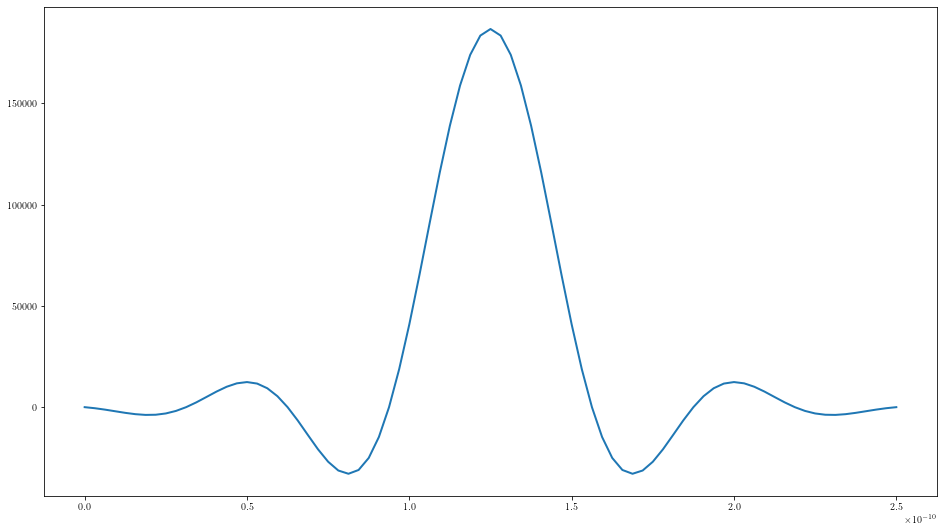

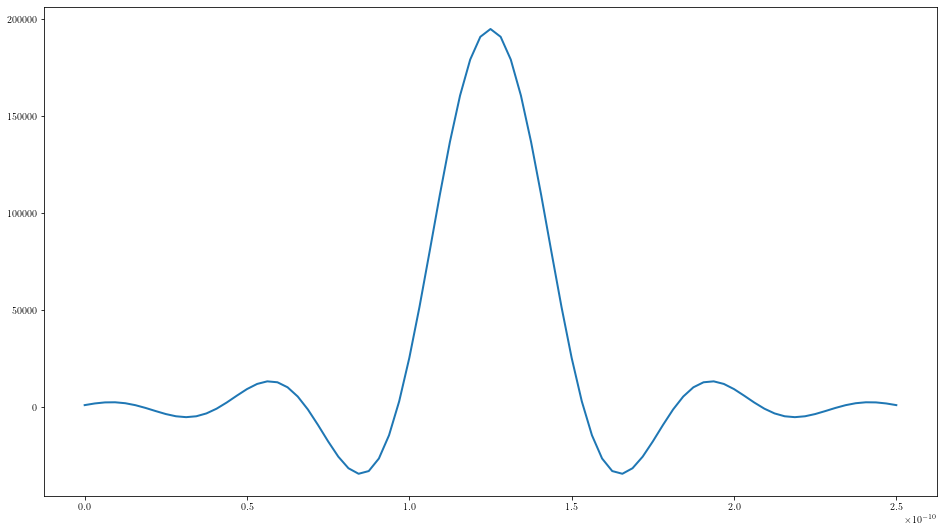

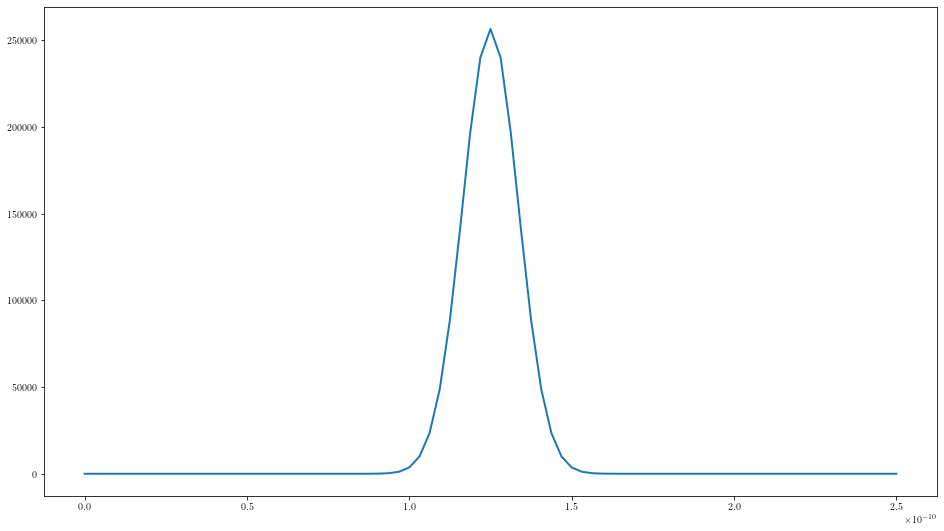

In [5]:
# parameters of the filters
f_symbol = 32e9  # symbol rate (Baud) (Symbols per second)
n_up = 10  # samples per symbol (>1 => oversampling)

r_rc = .33
r_rrc = .33

syms_per_filt = 4  # symbols per filter (plus minus in both directions)

t_sample_rc, rc = get_rc_ir(syms_per_filt, r_rc, f_symbol, n_up)
t_sample_rrc, rrc = get_rrc_ir(syms_per_filt, r_rrc, f_symbol, n_up)
t_sample_gaussian, gaussian = get_gaussian_ir(syms_per_filt, 0.99, f_symbol, n_up)

fig1, ax1 = plt.subplots(1, figsize=figure_size)
rc_plt = ax1.plot(np.arange(rc.size)*t_sample_rc, rc, linewidth=2.0, label='RC')

fig2, ax2 = plt.subplots(1, figsize=figure_size)
rrc_plt = ax2.plot(np.arange(rrc.size)*t_sample_rrc, rrc, linewidth=2.0, label='RRC')

fig3, ax3 = plt.subplots(1, figsize=figure_size)
gauss_plt = ax3.plot(np.arange(gaussian.size)*t_sample_gaussian, gaussian, linewidth=2.0, label='Gaussian')

In [7]:
output_fname = "fir"
output_path = "../../bachelorarbeit-ausarbeitung/figures/"

tikzplotlib.save(f'{output_path}{output_fname}_rc.tex', figure=fig1, wrap=False, add_axis_environment=False, externalize_tables=True, override_externals=True)
tikzplotlib.save(f'{output_path}{output_fname}_rrc.tex', figure=fig2, wrap=False, add_axis_environment=False, externalize_tables=True, override_externals=True)
tikzplotlib.save(f'{output_path}{output_fname}_gauss.tex', figure=fig3, wrap=False, add_axis_environment=False, externalize_tables=True, override_externals=True)